In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [7]:
mX = [
        [
            [-6, 2, -3],
            [4, -6, -2],
            [-8, -10, 9]
        ],
        [
            [9, 2, -6],
            [-1, 5, 2],
            [2, 5, 8]
        ],
        [
            [10, -3, 2, 0],
            [3, -9, 2, -3],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [13, -7, -2],
    [12, -7, -10],
    [19, 10, -10, -18]
]


In [9]:
def dominant(x):
    x = np.array(x)
    diagonal = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis = 1)
    sumWithoutDiagonal = sumWithDiagonal - diagonal

    if np.all(diagonal > sumWithoutDiagonal):
        return True
    else:
        return False

In [4]:
def seidel(x, y, tol, max):
    x = np.array(x)
    y = np.array(y)

    diagonal = np.diag(np.abs(x))
    x = -x
    np.fill_diagonal(x, 0)
    xBef = np.zeros(x.shape[0])
    for i in range(max):
        xNew = np.array(xBef)
        for j, row in enumerate(x):
            xNew[j] = (y[j] + np.dot(row, xNew)) / diagonal[j]
        distance = np.sqrt(np.dot(xNew - xBef, xNew - xBef))
        if distance < tol:
            return true
        xNew = xBef
    return False

In [10]:
for i, (x,y) in enumerate(zip(mX, mY)):
    if(dominant(x)):
        print("diagonally dominant")
        print(seidel(x, y, 0.01456, 5))
    else:
        print("not diagonally dominant")

not diagonally dominant
diagonally dominant
False
diagonally dominant
False


In [15]:
lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8, 12, 11]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62, 73, 89]


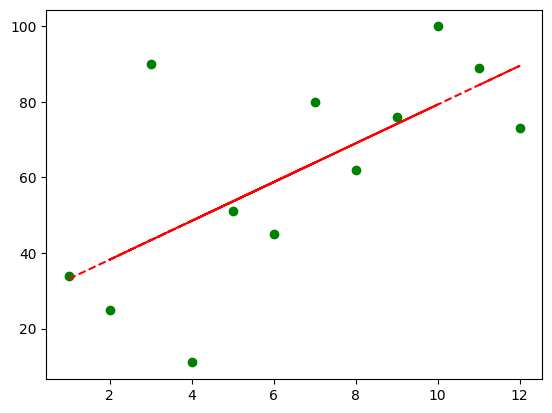

In [19]:
A = np.vstack([lx, np.ones(len(lx))]).T
Y = np.vstack(ly)


invers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(invers, A.T), Y)

m = beta[0]
c = beta[1]

yb = m * lx + c
plt.plot(lx, ly, "go", label = "(x,y) Points")
plt.plot(lx, yb, "r--", label = "Least Fit Regression")
plt.show()


In [22]:
x = symbols('x')

f1 = lambda x: 3*x**4 - 7*x**2 - 5 * x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 10*x**9 + 6*x**3 - 7
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

def NR(f, df, x, tol, max):
    if max == 6:
        return False
    if max > 0:
        print(f"Iteration: {max}, root: {x}")
    if np.abs(f(x)) < tol:
        print(x)
        print("Converged")
        return True
    return NR(f, df, x  - (f(x) / df(x)), tol, max + 1)
print(NR(f1, df1, 1, 0.00006541, 0))
print(NR(f2, df2, 1, 0.00006541, 0))

Iteration: 1, root: -0.2857142857142858
Iteration: 2, root: 0.39960950211519786
Iteration: 3, root: 0.09037873067676633
Iteration: 4, root: 0.0090431111476212
Iteration: 5, root: 0.00011165010334652017
False
Iteration: 1, root: 0.9166666666666666
Iteration: 2, root: 0.8801390964500637
Iteration: 3, root: 0.8745285102322558
Iteration: 4, root: 0.8744148227102518
0.8744148227102518
Converged
True


In [23]:
f = lambda x: 3*x**4 - 7*x**2 + 5
un = -4
up = 3
n = 10

x = np.linspace(un, up, n)
width = (up - un) / (n - 1)

xL = x[:-1]
xR = x[1:]
xM = (xL + xR) / 2

yL = f(xL)
yR = f(xR)
yM = f(xM)

left = width * np.sum(np.abs(yL))
right = width * np.sum(np.abs(yR))
mid = width * np.sum(np.abs(yM))

trap = width * np.sum(np.abs(yL) + (np.abs(yR))) / 2

print("left riemann: ", left)
print("right riemann: ", right)
print("mid riemann: ", mid)
print("trapezoid: ", trap)

left riemann:  817.8306660570034
right riemann:  447.6084438347813
mid riemann:  558.0362844840726
trapezoid:  632.7195549458924
